<a href="https://colab.research.google.com/github/federicopessina/algorithmic-trading-python/blob/master/TEXT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boring stuff: setting everything up

*Warning: run this section only once*

Connect to your Google Drive so that your work does not get lost when you end your session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change working directory to your Google Drive

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


Create the main directory for the laboratory inside your Google Drive

In [ ]:
!mkdir NLP_MASTER

mkdir: cannot create directory ‘NLP_MASTER’: File exists


Remove unwanted directories (if it is your first run these directories do not exist and the following two commands have no effect)

In [ ]:
!rm -rf /content/drive/MyDrive/NLP_MASTER/finance

In [ ]:
!rm -rf /content/drive/MyDrive/NLP_MASTER/spacy-projects

Now let's install all the dependencies for the laboratory

In [ ]:
!pip install -U spacy-nightly --pre

     |████████████████████████████████| 12.7 MB 177 kB/s 


In [ ]:
!pip install -U pip setuptools wheel

In [ ]:
!pip install -U spacy transformers

Now that everything is set up, change working directory to the newly created directory NLP_MASTER in your Google Drive

In [ ]:
%cd /content/drive/MyDrive/NLP_MASTER/

/content/drive/MyDrive/NLP_MASTER


Cline the official projects from the Spacy Repo, you are going to start from [this one](https://github.com/explosion/projects/tree/v3/tutorials/textcat_goemotions) and adapt it to the sentiment classification of financial news headlines

In [ ]:
!git clone https://github.com/explosion/projects.git spacy-projects

Cloning into 'spacy-projects'...
remote: Enumerating objects: 2684, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 2684 (delta 102), reused 146 (delta 74), pack-reused 2470
Receiving objects: 100% (2684/2684), 10.75 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (1655/1655), done.
Checking out files: 100% (264/264), done.


Let's now create a subdirectory "finance" inside NLP_MASTER, where we are going to copy the textcat_goemotions tutorial we just cloned with git with the command above

In [ ]:
!mkdir finance

In [ ]:
!cp -r spacy-projects/tutorials/textcat_goemotions/* finance/

In [ ]:
%cd /content/drive/MyDrive/NLP_MASTER/finance/

/content/drive/MyDrive/NLP_MASTER/finance


Spacy command line in action: now that we moved in the root directory of the project we tell Spacy to download everything the project needs in order to be run

In [ ]:
!spacy project assets

2021-06-22 12:38:52.999991: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
ℹ Fetching 4 asset(s)
✔ Downloaded asset
/content/drive/MyDrive/NLP_MASTER/finance/assets/categories.txt
✔ Downloaded asset
/content/drive/MyDrive/NLP_MASTER/finance/assets/train.tsv
✔ Downloaded asset
/content/drive/MyDrive/NLP_MASTER/finance/assets/dev.tsv
✔ Downloaded asset
/content/drive/MyDrive/NLP_MASTER/finance/assets/test.tsv


# Sentiment analysis: Reddit Posts Dataset

*Example records [TEXT_CONTENT, EMOTION_ID, TEXT_ID]:*

You can take a look at the dataset [here](https://drive.google.com/file/d/118kEBuOXikDJhlAvDVmAVxNBymtQ5MKb/view?usp=sharing)

*   My favourite food is anything I didn't have to cook myself.	27	eebbqej 
*   Thank you friend	15	eeqd04y
*   It's crazy how far Photoshop has come. Underwater bridges?!! NEVER!!!	7,13	efanc6t


Check out **assets/categories.txt** to explore the labels for this dataset. *The first row corresponds to the emotion_id 0, the second row to the emotion_id 1 and so on.*

---



***Edit project.yml and change gpu_id from -1 to 0 in order to take advantage of the Colab GPU***

Let Spacy **preprocess Reddit Posts Dataset** (assets/train.tsv, assets/dev.tsv, assets/test.tsv and assets/categories.txt) and format it as it internally needs.

In [ ]:
#!spacy project run preprocess

2021-06-22 12:19:45.319742: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

================================= preprocess =================================
Running command: /usr/bin/python3 scripts/convert_corpus.py
2021-06-22 12:19:48.056833: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Now that the dataset has been processed, **let's train the model** on the Reddit posts!

In [ ]:
#!spacy project run train

2021-06-22 12:20:16.267282: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

=================================== train ===================================
Running command: /usr/bin/python3 -c 'import os; os.makedirs(os.path.join('"'"'training'"'"', '"'"'cnn'"'"'))'
Running command: /usr/bin/python3 -m spacy train ./configs/cnn.cfg -o training/cnn --gpu-id 0

Aborted!


Automatic SpaCy evaluation of the model you just trained

In [ ]:
#!spacy project run evaluate

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
sh: 0: getcwd() failed: No such file or directory
Intel MKL FATAL ERROR: Cannot load /usr/local/lib/python3.7/dist-packages/torch/lib/libtorch_cpu.so.


Let's test the model on some examples, **feel free to change them to whatever you want**!

In [ ]:
#import spacy
#nlp = spacy.load("./training/cnn/model-best")

#texts = [
#    "It was really bad to watch you leave, hopefully you'll be back soon",
#    "Oh yes, I can relate to that. Still, you'd better think about it twice.",
#]

#for doc in nlp.pipe(texts):
    # Do something with the doc here
#    print(doc.cats)

#Data Preparation: from the Reddit Post Dataset to the Financial News Dataset
**TODO: Upload Financial News Dataset file FinancialPhraseBank_AllAgree.txt to the assets folder, you can find the dataset [here](https://drive.google.com/file/d/1WXM2t8sh-myIEUZt37zIXC2McNrCyS2l/view?usp=sharing)**\
Financial news dataset example records [TEXT_CONTENT, SENTIMENT_LABEL]:


*   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral
*   Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .@positive
*   Pharmaceuticals group Orion Corp reported a fall in its third-quarter earnings that were hit by larger expenditures on R&D and marketing .@negative



---

Now you have to **format the Financial News Dataset like the Reddit Posts Dataset**, in order to retrain the sentiment classifier on the new financial dataset.

Remember to split the dataset into train (70%), validation (10%) and test (20%), **saving the respective TSV files (train.tsv, dev.tsv, test.tsv) in the asset folder** .



In [ ]:
import pandas as pd
import uuid 
import numpy as np

df = pd.read_csv('assets/Sentences_All.csv', sep='\t')

df.columns = ['text', 'sentiment', 'index']
df.head()

,text,sentiment,index
0,Marimekko Group 's full-year net sales are est...,positive,0
1,"In addition , a further 29 employees can be la...",negative,1
2,Neste Oil s refineries have a combined crude o...,neutral,2
3,"In food trade , sales amounted to EUR320 .1 m ...",negative,3
4,The employment contracts of 14 of the employee...,negative,4


In [ ]:
labels_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment'] = df['sentiment'].map(labels_dict)

df.head()

,text,sentiment,index
0,Marimekko Group 's full-year net sales are est...,2,0
1,"In addition , a further 29 employees can be la...",0,1
2,Neste Oil s refineries have a combined crude o...,1,2
3,"In food trade , sales amounted to EUR320 .1 m ...",0,3
4,The employment contracts of 14 of the employee...,0,4


In [ ]:
df = df.sample(frac=1)


df_train, df_dev, df_test = df[:int(len(df)*0.7)].copy(), df[int(len(df)*0.7):int(len(df)*0.9)].copy(), df[int(len(df)*0.9):].copy()
# assuming you have changed the format of the dataset to the one assumed by the
# Spacy tutorial and split it in train/dev/test it's now time to write the datasets
# to the assets folder
# PAY ATTENTION: df, df_train, df_dev and df_test do not exist yet and you need
# to create them!
df.to_csv('assets/financial_emotions.tsv',sep='\t',index=None, header=None)
df_train.to_csv('assets/train.tsv',sep='\t',index=None, header=None)
df_dev.to_csv('assets/dev.tsv',sep='\t',index=None, header=None)
df_test.to_csv('assets/test.tsv',sep='\t',index=None, header=None)

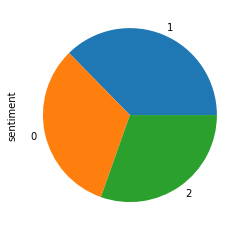

In [ ]:
df['sentiment'].value_counts().plot.pie()

If you didn't do it before, check out the file under assets/categories.txt : it contains the (many) labels for the sentiment classification of the Reddit Posts Dataset, now you have to **change it to the labels of the Financial News Dataset (neutral, positive, negative)**.

In [ ]:
!echo -en "neutral\npositive\nnegative" > /content/drive/MyDrive/NLP_MASTER/finance/assets/categories.txt

Let again Spacy **preprocess our input files** (assets/train.tsv, assets/dev.tsv, assets/test.tsv and assets/categories.txt) and format them as it internally needs.

In [ ]:
!spacy project run preprocess

2021-06-22 12:42:23.085393: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

================================= preprocess =================================
ℹ Skipping 'preprocess': nothing changed


Spacy is a bit picky about existing directories, **delete the previous CNN model** you trained on the Reddit Posts Dataset

In [ ]:
!rm -rf /content/drive/MyDrive/NLP_MASTER/finance/training/cnn

Everything is ready, **let's train the model** on the Financial News Dataset!

In [ ]:
!spacy project run train

2021-06-22 12:42:32.710320: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

=================================== train ===================================
Running command: /usr/bin/python3 -c 'import os; os.makedirs(os.path.join('"'"'training'"'"', '"'"'cnn'"'"'))'
Running command: /usr/bin/python3 -m spacy train ./configs/cnn.cfg -o training/cnn --gpu-id 0
2021-06-22 12:42:36.094549: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
Set up nlp object from config
Pipeline: ['textcat']
Created vocabulary
Finished initializing nlp object
Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  

In [ ]:
!spacy project run evaluate

2021-06-22 12:45:59.935514: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

================================== evaluate ==================================
Running command: /usr/bin/python3 -m spacy evaluate ./training/cnn/model-best ./corpus/test.spacy --output ./metrics/cnn.json
2021-06-22 12:46:03.272228: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
ℹ Using CPU

================================== Results ==================================

TOK                   100.00
TEXTCAT (macro AUC)   88.92 
SPEED                 24069 


=========================== Textcat F (per label) ===========================

               P       R       F
neutral    79.25   64.62   71.19
positive   74.24   74.24   74.24
negative   75.00   68.42   71.56


======================== Textcat ROC AUC (per label) ========================

           ROC AUC
neutral   

# Running predictions on examples!

In [ ]:
import spacy
nlp = spacy.load("./training/cnn/model-best")

texts = [
    "Net income was $9.4 million compared to the prior year of $2.7 million.",
    "Revenue exceeded twelve billion dollars, with a loss of $1b.",
    "Very good, excellent",
    "perfect",
    "very bad, only loss, bankruptcy"
]

for doc in nlp.pipe(texts):
    # Do something with the doc here
    print(doc.cats)

{'neutral': 0.7215504050254822, 'positive': 0.001161465304903686, 'negative': 0.10287430882453918}
{'neutral': 0.09399688243865967, 'positive': 0.3930477797985077, 'negative': 0.002560879336670041}
{'neutral': 1.6494764167873655e-06, 'positive': 4.871281635132618e-05, 'negative': 0.9999992847442627}
{'neutral': 0.26363271474838257, 'positive': 0.9999988079071045, 'negative': 6.585049866503212e-11}
{'neutral': 0.97299724817276, 'positive': 0.0010659563122317195, 'negative': 0.031167391687631607}


# Next task: sentiment as a Prophet regressor

Your task is to find a source of forex news, run the model on the news, and then include the sentiment output as an extra Prophet regressor for the Forex forecasting model.


---

You can get news data from Forex news archives like [this one](http://www.forexrate.co.uk/newsarchive.php).

**If you do not want to look for a source to scrape yourself, you can use the dataset we built for you [here](https://drive.google.com/file/d/1bkFj9rnEBDifyjXiCg52n2vLjEzE-6mK/view?usp=sharing)**




***The following cell does not need to be executed and it just shows you how to build a dataset (the forex news dataset you can download from the link above) scraping a website.***

In [ ]:
# PAY ATTENTION: NO NEED TO EXECUTE THIS CELL, IT IS JUST FOR DATASET BUILDING 
# DEMONSTRATION PURPOSES

import requests
from bs4 import BeautifulSoup
import pandas as pd

offset = 0
max_offset = 1649
offset_increment = 12

BASE_URL = 'http://www.forexrate.co.uk/'

news_archive = []

for i in range(0,max_offset,offset_increment):
  url = f'http://www.forexrate.co.uk/newsarchive.php?start={i}'
  print(url)
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')
  tables = soup.findChildren('table')
  news_table = tables[1]
  rows = news_table.findChildren(['th', 'tr'])

  for idx,row in enumerate(rows):
    if idx == 0:
        continue
    cells = row.findChildren('td')
    for idx,cell in enumerate(cells):
      txt = cell.text
      href = cell.find('a')['href']
      href = BASE_URL + href.replace('./','')
      if "newsarchive.php?start=" in href:
        continue
      # let's get the date of the article
      date_page = requests.get(href)
      date_soup = BeautifulSoup(date_page.content, 'html.parser')
      date_div = date_soup.findChildren('div')[3]
      date_str = date_div.text
      news_archive.append({'txt':txt,'url':href,'date':date_str})
      print(len(news_archive), date_str, {'txt':txt,'url':href,'date':date_str})

df = pd.DataFrame(news_archive)

http://www.forexrate.co.uk/newsarchive.php?start=0
1 22-06-2021 02:21 {'txt': '\nGBPUSD - GBPUSD slips further again below 1.3900\n\t\t\tGBPUSD is posting losses again after a bullish day and is still remaining beneath the 1.3900 handle. The 20- and 40-day simple moving averages (SMAs) are moving lower, approaching ...\t\t', 'url': 'http://www.forexrate.co.uk/GBPUSD---GBPUSD-slips-further-again-below-1-3-news1624357456.html', 'date': '22-06-2021 02:21'}
2 22-06-2021 02:07 {'txt': '\nOil Price - Azerbaijani oil prices change\n\t\t\tThe price of Azeri LT CIF Augusta, produced at the Azeri-Chirag-Deepwater Gunashli (ACG) field, went down by 22 cents on June 21 compared to the previous price, settling at $74.29 per barrel, Trend ...\t\t', 'url': 'http://www.forexrate.co.uk/Oil-Price---Azerbaijani-oil-prices-change-news1624357459.html', 'date': '22-06-2021 02:07'}
3 21-06-2021 02:53 {'txt': '\nEURUSD - EUR/USD finds footing near 23.6% Fibo, upside bias weak\n\t\t\tEURUSD has steadied slight

KeyboardInterrupt: ignored

In [ ]:
#!wget --directory-prefix=assets 'https://doc-08-1s-docs.googleusercontent.com/docs/securesc/gorbod9c68e2k2b6dmkv5ks0k9p9js8l/leld0p7kfh7s4j87nqpjosfvh2u53qrb/1624291800000/06099204812823034457/06914091963176412087/1bkFj9rnEBDifyjXiCg52n2vLjEzE-6mK?e=download&authuser=0&nonce=0748drkcir0e8&user=06914091963176412087&hash=90c4oegldfieidb1g5elboeo9nfk83nl'

In [ ]:
fx = pd.read_csv("/content/drive/MyDrive/hist_fx.csv")

In [ ]:
fx.head()

,txt,url,date
0,\nOil Price - Nigeria: Rising Oil Prices Will ...,http://www.forexrate.co.uk/Oil-Price---Nigeria...,18-06-2021 02:47
1,\nGold Price - Gold Price Today: Yellow metal ...,http://www.forexrate.co.uk/Gold-Price---Gold-P...,18-06-2021 02:41
2,\nBrent Oil - Oil Near $72 as Investors Size U...,http://www.forexrate.co.uk/Brent-Oil---Oil-Nea...,17-06-2021 02:46
3,\nGBPUSD - FxWirePro- GBPJPY Daily Outlook\n\t...,http://www.forexrate.co.uk/GBPUSD---FxWirePro-...,17-06-2021 00:48
4,\nEURGBP - Sterling ticks higher on surprise i...,http://www.forexrate.co.uk/EURGBP---Sterling-t...,16-06-2021 01:48


In [ ]:
fx_ = []
for line in fx['txt']:
  fx_.append(line[1:])

In [ ]:
fx = pd.DataFrame({'txt': fx_, 'date':fx['date']})

In [ ]:
# ZERO means negative, ONE means neutral and TWO means positive :(
sentiments = []
for doc in nlp.pipe(fx['txt']):
  pred = doc.cats
  vals = [pred['positive'], pred['negative'], pred['neutral']]
  prediction = np.argmax(vals)
  sentiments.append(prediction)

In [ ]:
fx['sentiment'] = sentiments

In [ ]:
fx['date'] = fx['date'].str[:-6]

In [ ]:
fx.head()

,txt,date,sentiment
0,Oil Price - Nigeria: Rising Oil Prices Will Cr...,18-06-2021,2
1,Gold Price - Gold Price Today: Yellow metal ab...,18-06-2021,0
2,Brent Oil - Oil Near $72 as Investors Size Up ...,17-06-2021,2
3,GBPUSD - FxWirePro- GBPJPY Daily Outlook\n\t\t...,17-06-2021,2
4,EURGBP - Sterling ticks higher on surprise inf...,16-06-2021,2


In [ ]:
fx_pivot = pd.pivot_table(fx, values='sentiment', index=['date'])

In [ ]:
fx_pivot

,sentiment
date,
01-01-2019,2.0
01-01-2020,1.5
01-01-2021,1.0
01-02-2018,2.0
01-02-2019,1.5
...,...
31-10-2018,1.0
31-10-2019,2.0
31-12-2018,1.0


In [ ]:
fx_pivot.index = pd.to_datetime(fx_pivot.index)

In [ ]:
fx_pivot.dtypes

sentiment    float64
dtype: object

In [ ]:
fx_pivot.index = fx_pivot.index.strftime('%Y-%m-%d')

In [ ]:
fx_pivot.head()

,sentiment
date,
2019-01-01,2.0
2020-01-01,1.5
2021-01-01,1.0
2018-01-02,2.0
2019-01-02,1.5


In [ ]:
fx_pivot = fx_pivot.sort_index()

In [ ]:
fx_pivot.head()

,sentiment
date,
2018-01-02,2.0
2018-01-03,1.0
2018-01-05,0.0
2018-01-06,2.0
2018-01-08,0.0


In [ ]:
fx_pivot = fx_pivot[~(fx_pivot.index >= '2021-06-20')]

In [ ]:
fx_pivot.index = pd.to_datetime(fx_pivot.index)

In [ ]:
fx_pivot = fx_pivot.groupby(pd.Grouper(freq='D')).mean().fillna(1)

In [ ]:
fx_pivot.to_csv("sentiment_data.csv", sep = ',', index = True)